## Newton Methods

In [9]:
# Newton Methods
import numpy as np
import pandas as pd


def F(x) :
    return x + np.exp(-x**2)
def f(x) :
    return  1 - 2*x*np.exp(-x**2)
def newton(x0, error, i_max):
    x = x0
    A=np.array([[x0, None , F(x0),f(x0),abs(x-x0), error]])
    i = 0
    while i < i_max :
        x0 = x
        x  = x0 - F(x)/f(x)
        A  = np.append(A,[[x0, x , F(x0),f(x0),abs(x-x0), error]],axis=0)
        if abs(x-x0) < error :
            return x,A
        i+=1
akar, table = newton(-1,1e-6, 5)
table = pd.DataFrame(table, columns=['x0','x','f(x0)',"f'(x0)","|x-x0|", "error"])
table['|x-x0| < error'] = table['|x-x0|'] < table['error']
table = table.iloc[1:]
print(akar)
table

-0.6529186404192047


,x0,x,f(x0),f'(x0),|x-x0|,error,|x-x0| < error
1,-1,-0.635825,-0.632121,1.73576,0.364175,1e-06,False
2,-0.635825,-0.652937,0.0316372,1.84878,0.0171125,1e-06,False
3,-0.652937,-0.652919,-3.43259e-05,1.85261,1.85284e-05,1e-06,False
4,-0.652919,-0.652919,-3.30304e-11,1.85261,1.78292e-11,1e-06,True


## Bisection Method

In [17]:
import pandas as pd
import numpy as np
def f(x) :
    return 1/2 + np.sin(x) - np.cos(x)

def my_bisec(a,b,error):
    c = (a + b)/2
    A=np.array([[a, b , c,f(a),f(b),f(c), b - c, error]])
    jumlah_iterasi_maksimal = np.ceil((np.log(abs(b-a))-np.log(error))/np.log(2))
    i = 0
    while i < jumlah_iterasi_maksimal :
        A=np.append(A,[[a, b , c,f(a),f(b),f(c), b - c, error]],axis=0)
        if (b - c) <= error :
            print("akar :", c)
            return A
        if math.isnan(f(c)) :
            print("terdapat nilai f(c) tidak terdefinisi, sehingga iterasi dihentikan.")
            return A
        if f(a)*f(c)<0:
            b=c
            c=(a+b)/2
        elif f(c)*f(b)<0:
            a=c
            c=(a+b)/2
        i = i + 1
    else :
        print("Metode biseksi gagal")
        return (A)

table = my_bisec(0,1,0.0001)
df = pd.DataFrame(table,columns=['a', 'b' , 'c','f(a)','f(b)','f(c)', 'b - c', 'error'])
df = df.iloc[1:]
df['b-c <= error'] = df['b - c'] < df['error']
df

akar : 0.42401123046875


,a,b,c,f(a),f(b),f(c),b - c,error,b-c <= error
1,0.000000,1.000000,0.500000,-0.500000,0.801169,0.101843,0.500000,0.0001,False
2,0.000000,0.500000,0.250000,-0.500000,0.101843,-0.221508,0.250000,0.0001,False
3,0.250000,0.500000,0.375000,-0.221508,0.101843,-0.064235,0.125000,0.0001,False
4,0.375000,0.500000,0.437500,-0.064235,0.101843,0.017863,0.062500,0.0001,False
5,0.375000,0.437500,0.406250,-0.064235,0.017863,-0.023442,0.031250,0.0001,False
6,0.406250,0.437500,0.421875,-0.023442,0.017863,-0.002851,0.015625,0.0001,False
7,0.421875,0.437500,0.429688,-0.002851,0.017863,0.007491,0.007812,0.0001,False
8,0.421875,0.429688,0.425781,-0.002851,0.007491,0.002316,0.003906,0.0001,False
9,0.421875,0.425781,0.423828,-0.002851,0.002316,-0.000268,0.001953,0.0001,False
10,0.423828,0.425781,0.424805,-0.000268,0.002316,0.001024,0.000977,0.0001,False


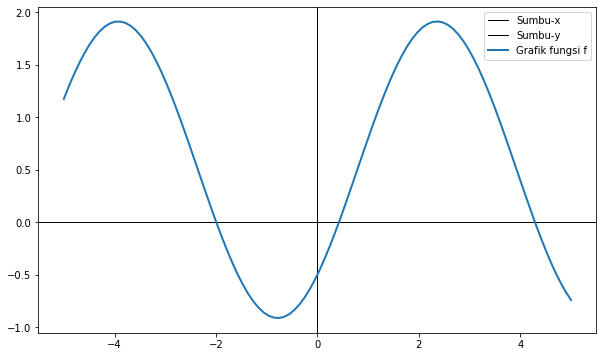

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5,5,100)
y = np.array([(1/2 + np.sin(n) - np.cos(n)) for n in x])
fig, axes = plt.subplots(figsize=(10,6))
axes.axhline(linewidth=1, color='black', label = 'Sumbu-x')
axes.axvline(linewidth=1, color='black', label = 'Sumbu-y')
axes.plot(x, y, lw = 2, label = 'Grafik fungsi f')
plt.legend()
plt.show()

## Secant Method

In [50]:
# secant method
import pandas as pd
import numpy as np

def f(x) : 
    return 1/2 + np.sin(x) - np.cos(x)  
    
def secant(x0,x1,error):
    i = 0
    xOld=x0
    xNew=x1
    while True:
        x = xNew-(f(xNew)*(xNew-xOld)/(f(xNew)-f(xOld)))
        if i == 0 :
            A=np.array([[xOld, xNew , x,f(xOld),f(xNew),abs(x-xNew), error]])
        else :
            A=np.append(A,[[xOld, xNew , x,f(xOld),f(xNew),abs(x-xNew), error]],axis=0)
        
        if abs(x-xNew) < error:
            return x,A
        
        xOld=xNew
        xNew=x
        
        i+=1
        
akar, table = secant(0,1,1e-6)
df = pd.DataFrame(table,columns=['x0', 'x1' , 'x2','f(x0)','f(x1)','|x2-x1|', 'error'])
df['|x2-x1| < error'] = df['|x2-x1|'] < df['error']
df = df.iloc[:]
df

,x0,x1,x2,f(x0),f(x1),|x2-x1|,error,|x2-x1| < error
0,0.000000,1.000000,0.384270,-0.500000,8.011687e-01,6.157301e-01,0.000001,False
1,1.000000,0.384270,0.421927,0.801169,-5.218996e-02,3.765700e-02,0.000001,False
2,0.384270,0.421927,0.424048,-0.052190,-2.782363e-03,2.120634e-03,0.000001,False
3,0.421927,0.424048,0.424031,-0.002782,2.186377e-05,1.653399e-05,0.000001,False
4,0.424048,0.424031,0.424031,0.000022,-8.713305e-09,6.586619e-09,0.000001,True


In [52]:
round(f(0.424031),8)

-5e-08

In [47]:
# secant method 
import pandas as pd 
import numpy as np

def f(x) : 
    return (x**3 - x**2 - x - 1)
def secant(x0,x1,error): 
    i = 0 
    xOld=x0 
    xNew=x1 
    while True:
        x = xNew-(f(xNew)*(xNew-xOld)/(f(xNew)-f(xOld))) 
        if i == 0 : 
            A=np.array([[xOld, xNew , x,f(xOld),f(xNew),abs(xNew-xOld), error]]) 
        else : 
            A=np.append(A,[[xOld, xNew , x,f(xOld),f(xNew),abs(xNew-xOld), error]],axis=0)
        if abs(xNew-xOld)<error: 
            return x,A
        xOld=xNew 
        xNew=x
        i+=1
akar, table = secant(1,2,1e-6) 
df = pd.DataFrame(table,columns=['x0', 'x1' , 'x2','f(x0)','f(x1)','|x1-x0|','error']) 
df['|x1-x0| < error'] = df['|x1-x0|'] < df['error'] 
df = df.iloc[:] 
df

,x0,x1,x2,f(x0),f(x1),|x1-x0|,error,|x1-x0| < error
0,1.000000,2.000000,1.666667,-2.000000,1.000000e+00,1.000000e+00,0.000001,False
1,2.000000,1.666667,1.816327,1.000000,-8.148148e-01,3.333333e-01,0.000001,False
2,1.666667,1.816327,1.842994,-0.814815,-1.232310e-01,1.496599e-01,0.000001,False
3,1.816327,1.842994,1.839216,-0.123231,2.034159e-02,2.666738e-02,0.000001,False
4,1.842994,1.839216,1.839287,0.020342,-3.890397e-04,3.778278e-03,0.000001,False
5,1.839216,1.839287,1.839287,-0.000389,-1.188567e-06,7.090473e-05,0.000001,False
6,1.839287,1.839287,1.839287,-0.000001,6.981682e-11,2.172871e-07,0.000001,True


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-4,3,100000)
y = np.array([(n**3 + np.log((n**2 + n - 4)/(n**2 - n + 5)) + 2) for n in x])
fig, axes = plt.subplots(figsize=(10,6))
axes.axhline(linewidth=1, color='black', label = 'Sumbu-x')
axes.axvline(linewidth=1, color='black', label = 'Sumbu-y')
axes.plot(x, y, lw = 2, label = 'Grafik fungsi f')
axes.set_xticks(np.arange(-5, 5, step=0.5))
axes.set_yticks(np.arange(-50, 50, step=10))
plt.legend()
plt.show()

In [ ]:
x = np.linspace(-5,5,1000)
y = [(n + np.exp(-n**2)) for n in x]
fig, axes = plt.subplots(figsize=(12,7))
axes.axhline(linewidth=2, color='black', label = 'Sumbu-x')
axes.axvline(linewidth=2, color='black', label = 'Sumbu-y')
axes.plot(x, y, lw = 2, label = 'Grafik fungsi f')
axes.set_xticks(np.arange(-5, 6, step=0.5))
axes.set_yticks(np.arange(-5, 6, step=0.5))
plt.legend()
plt.show()